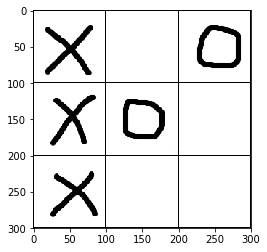

In [12]:
%matplotlib inline  

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('morpion1.png')
plt.imshow(img)

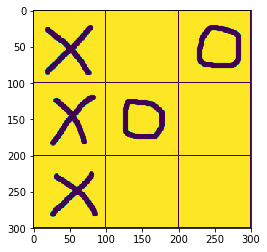

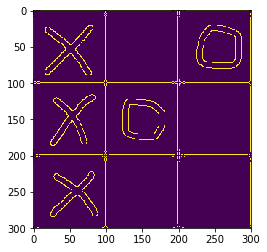

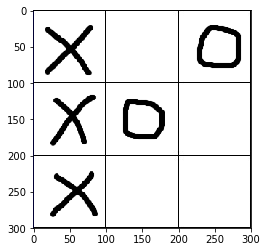

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.figure()
plt.imshow(edges)

lines = cv2.HoughLines(edges,2,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.figure()
plt.imshow(img)